# Building a Linear Regression Model from Scratch
The objectives of this project are to build a linear regression model using gradient descent and evaluate its performance on both synthetic and real datasets.

### Load dependencies and create synthetic data
Generate 100 single-feature samples from $y = 3x + 4$ with noise. Target weights are ```(4, 3)```.

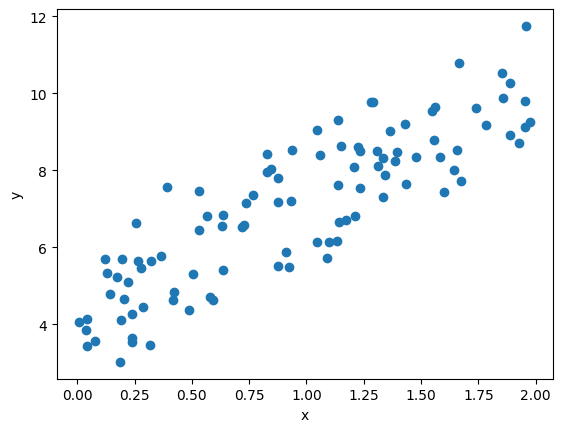

In [221]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100)

plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Verify the shapes of arrays ```X``` and ```y```:

In [222]:
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (100, 1)
y: (100,)


### Initialization function
From feature matrix ```X```, return an initialized weight vector, and augment ```X``` with a column of ones for the intercept (bias) term.

In [223]:
def init(X):
    X_bias = np.c_[np.ones(X.shape[0]), X] # prepend ones column: bias trick
    weights = np.zeros(X_bias.shape[1]) # weights including bias initialized to zero. shape: (# of features + 1,)
    return weights, X_bias

w, X_bias = init(X)
print(f"w: {w.shape}")
print(f"X_bias: {X_bias.shape}")

w: (2,)
X_bias: (100, 2)


### Prediction function
Then, predict for ```y``` using ```X_bias``` and ```w```.

In [224]:
def predict_y(X, weights):
    return np.matmul(X, weights) # matrix multiplication; shape becomes (n,)

# w = np.array([4,3])
# print(predict_y(X_bias, w))

### Cost function (mean squared error)
Using vectorized operations, compute the squared differences between the predicted (```predict_y(X, weights)```) and actual values (```y```) for each sample, then return the average of these differences as the loss.

In [225]:
def cost_function(X, y, weights):
    y_predicted = predict_y(X, weights)
    return np.mean((y_predicted - y) ** 2) # average loss, a single value

### Computing gradients
Calculate how much the output of the aforementioned cost function (average loss per sample) changes with respect to ```weights```.

Computing the gradient = finding the partial derivative of the cost function with respect to ```weights```, or the average gradient per sample.

In [226]:
def compute_gradients(X, y, weights):
    y_predicted = predict_y(X, weights) # y_prediction is the product of X and weights

    # observe then: power rule prepends the 2 coefficient, and chain rule upon y_prediction prepends the X coefficient
    gradients_of_error = 2 * np.matmul(X.T, (y_predicted - y)) # transpose X for multiplication to work
    # this product is a vector where each element sums over all samples' contributions for a respective weight.

    # divide each element by the number of samples to get average gradient per sample:
    return gradients_of_error / len(y)

print(compute_gradients(X_bias, y, w).shape)

(2,)


### Implementation of gradient descent
In order to reduce the error, ```weights``` should be updated according to the computed gradients and learning rate.

In [227]:
def gradient_descent(X, y, weights, learning_rate):
    weights -= learning_rate * compute_gradients(X, y, weights)

Final linear regression model recovers weights ```(4.22, 2.97)```, closely approximating target values ```(4, 3)``` despite noise in the data.

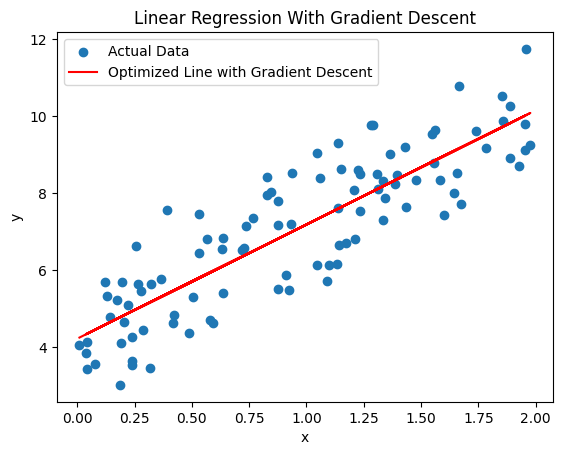

w: [4.222151   2.96846758]


In [228]:
learning_rate = 0.05
iterations = 1000

w, X_bias = init(X)
for _ in range(iterations):
    gradient_descent(X_bias, y, w, learning_rate)

plt.scatter(X, y, label="Actual Data")
plt.plot(X, X_bias.dot(w), color="red", label="Optimized Line with Gradient Descent")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(f"w: {w}")

### Testing on more data
Constructed as a reusable class, the model is effective at fitting a linear relationship on the aforementioned synthetic data:

In [229]:
class LinearRegressor():
    def __init__(self, learning_rate=0.05, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    def fit(self, X, y):
        X_bias = np.c_[np.ones(X.shape[0]), X] # bias trick
        self.weights_ = np.zeros(X_bias.shape[1]) # initialized weights
        
        for _ in range(self.iterations): # gradient descent
            y_predicted = np.matmul(X_bias, self.weights_)
            gradients_of_error = 2 * np.matmul(X_bias.T, (y_predicted - y)) / len(y)
            self.weights_ -= self.learning_rate * gradients_of_error

        # for convenient access
        self.intercept_ = self.weights_[0]
        self.coef_ = self.weights_[1:]

    def predict(self, X):
        if X.ndim == 1:
            # single sample: bias trick and dot product
            X_bias = np.insert(X, 0, 1)  # 1D array with bias prepended
            return np.dot(X_bias, self.weights_)
        else:
            # multiple samples: bias column trick and matrix multiply
            X_bias = np.c_[np.ones(X.shape[0]), X]
            return np.matmul(X_bias, self.weights_)

model = LinearRegressor()
model.fit(X, y)
for input_x in [1, 3, 10, 50]:
    predicted_y = model.predict(np.array([[input_x]]))
    print(f"On input x = {input_x}, predicted value y = {predicted_y} should approximate {3 * input_x + 4}")
print(f"intercept: {model.intercept_}, coefficient(s): {model.coef_}")

On input x = 1, predicted value y = [7.19061858] should approximate 7
On input x = 3, predicted value y = [13.12755374] should approximate 13
On input x = 10, predicted value y = [33.90682681] should approximate 34
On input x = 50, predicted value y = [152.64553007] should approximate 154
intercept: 4.222150997691829, coefficient(s): [2.96846758]


Using ```make_regression``` to generate synthetic data, we can test the model's ability to fit an unknown linear relationship.

To see how the model adapts to different data, feel free to:
- adjust or remove the ```random_state``` parameter to generate new data on each run
- uncomment the line ```y = -y``` to invert the target values and observe the model's handling of negative relationships

intercept: -1.2212727405460868, coefficient(s): [42.73639301]


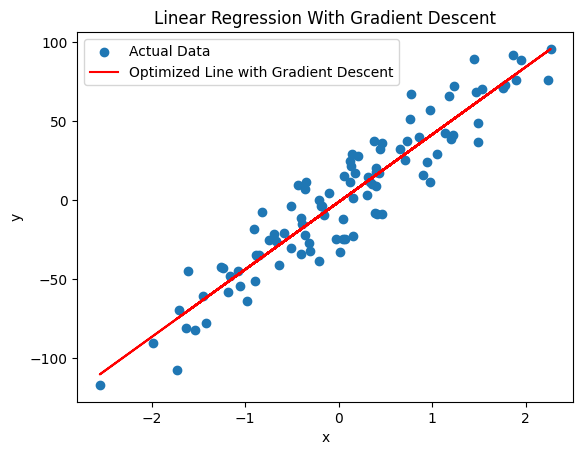

In [230]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=0)
# y = -y

model = LinearRegressor()
model.fit(X, y)
print(f"intercept: {model.intercept_}, coefficient(s): {model.coef_}")

plt.scatter(X, y, label="Actual Data")
plt.plot(X, model.predict(X), color="red", label="Optimized Line with Gradient Descent")
plt.title("Linear Regression With Gradient Descent")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.show()

We can also test the model on the ```sklearn``` California Housing dataset.

In [231]:
from sklearn.datasets import fetch_california_housing

X, y = fetch_california_housing(return_X_y=True)

housing = fetch_california_housing(as_frame=True)
housing.frame.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


However, this dataset contains features with widely varying scales, particularly the ```Population``` feature:

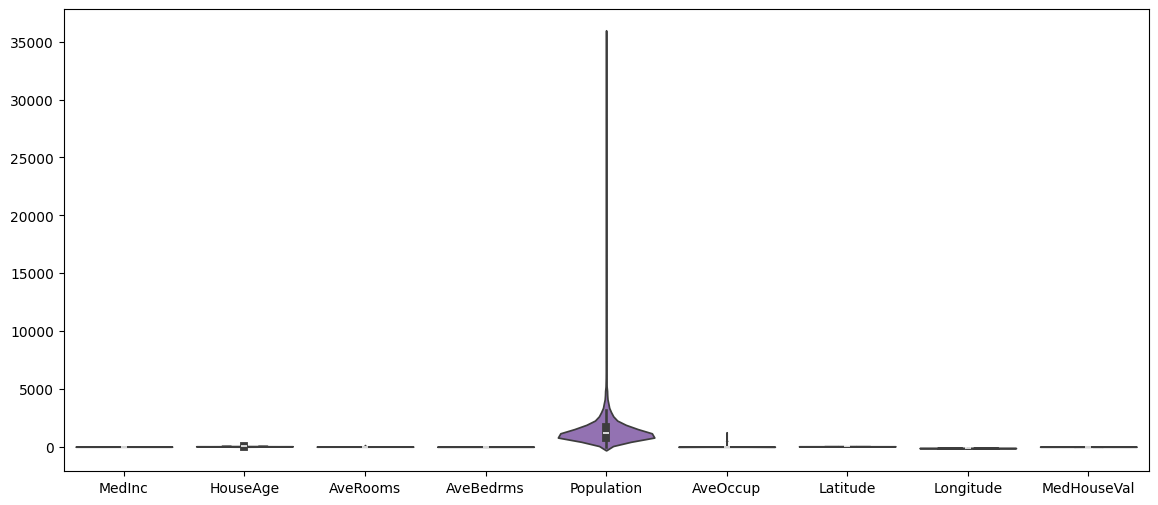

In [232]:
import seaborn as sns

plt.figure(figsize=(14,6))
sns.violinplot(data=housing.frame)
plt.show()

This calls for standardizing the features before feeding them to the model (to prevent issues such as exploding gradients), alongside back-transforming the coefficients afterward for interpretability.

In [233]:
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegressor()
model.fit(X_scaled, y)

# back-transforming
coef_original = model.coef_ / scaler.scale_
intercept_original = model.intercept_ - np.sum((scaler.mean_ / scaler.scale_) * model.coef_)

print(f"intercept: {intercept_original}, coefficient(s): {coef_original}")

intercept: -36.81982866966164, coefficient(s): [ 4.37340684e-01  9.45688983e-03 -1.08234712e-01  6.48944871e-01
 -3.90513375e-06 -3.79123174e-03 -4.19866848e-01 -4.33040416e-01]


The equation modeled is approximately $y = 0.437a + 0.00946b - 0.108c + 0.649d - 0.00000391e - 0.00379f - 0.420g - 0.433h - 36.82$, where:
- $y$ is the predicted median house value (in units of $100,000) for a block group,
- $a$ is the median household income (in units of $10,000) in the block group,
- $b$ is the average house age (in years) in the block group,
- $c$ is average number of rooms per household,
- $d$ is average number of bedrooms per household,
- $e$ is the total population of the block group,
- $f$ is the average number of household members,
- $g$ and $h$ are the latitude and longitude coordinates of the block group centroid.

The coefficients suggest that household income, number of bedrooms per household, and the block group's geographic location (particularly its proximity to California's southwest coast) are relatively significant factors in predicting median house value.

For a mere linear regressor, the model provides decent ballpark estimates of median house values (in units of $100,000) for the block group samples in the dataset:

In [256]:
for i in range(10):
    predicted_y = model.predict(X_scaled[i])
    print(f"For block group index {i}, predicted value y = {predicted_y} should approximate real value {y[i]}")

For block group index 0, predicted value y = 4.13235114191446 should approximate real value 4.526
For block group index 1, predicted value y = 3.9774855239402833 should approximate real value 3.585
For block group index 2, predicted value y = 3.6757687037808893 should approximate real value 3.521
For block group index 3, predicted value y = 3.241995562187955 should approximate real value 3.413
For block group index 4, predicted value y = 2.4124306022061512 should approximate real value 3.422
For block group index 5, predicted value y = 2.67570783776581 should approximate real value 2.697
For block group index 6, predicted value y = 2.3948686553830703 should approximate real value 2.992
For block group index 7, predicted value y = 2.2463701005491545 should approximate real value 2.414
For block group index 8, predicted value y = 1.7910887377225735 should approximate real value 2.267
For block group index 9, predicted value y = 2.4279709135584686 should approximate real value 2.611


### Summary
This project saw the implementation of a linear regression model from scratch using gradient descent. The model was tested on both synthetic data and the real-world California Housing dataset. Despite its simplicity, the model was able to provide reasonable predictions of median house values and identified underlying relationships between the target and features such as household income, bedroom count, and geographic location.